# Common Libraries

In [1]:
# Installing necessary packages
!pip install pandas numpy matplotlib seaborn scipy scikit-learn plotly

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

print("Libraries imported successfully!")

Libraries imported successfully!


# Uploading Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("Data imported successfully!")
print(f"Shape: {df.shape}")
df.head()

Saving team_data.csv to team_data.csv
Data imported successfully!
Shape: (32, 83)


,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,...,100,115,23,5,2,1,357,83,90,48.0
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,...,52,34,1,0,0,0,200,72,72,50.0
2,Belgium,20,30.6,57.0,3,33,270,3.0,1,1,...,30,35,3,0,1,0,132,33,28,54.1
3,Brazil,26,28.5,56.2,5,55,480,5.3,8,6,...,63,74,8,1,0,0,271,43,56,43.4
4,Cameroon,22,28.0,41.7,3,33,270,3.0,4,4,...,32,38,2,0,0,0,142,42,36,53.8


# Viewing Data

In [3]:
# Check basic info about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (32, 83)

Column names:
['team', 'players_used', 'avg_age', 'possession', 'games', 'games_starts', 'minutes', 'minutes_90s', 'goals', 'assists', 'goals_pens', 'pens_made', 'pens_att', 'cards_yellow', 'cards_red', 'goals_per90', 'assists_per90', 'xg', 'gk_games', 'gk_games_starts', 'gk_minutes', 'gk_goals_against', 'gk_goals_against_per90', 'gk_shots_on_target_against', 'gk_saves', 'gk_clean_sheets', 'gk_pens_att', 'gk_pens_allowed', 'gk_pens_saved', 'gk_pens_missed', 'shots', 'shots_on_target', 'shots_per90', 'shots_on_target_per90', 'goals_per_shot', 'goals_per_shot_on_target', 'average_shot_distance', 'passes_completed', 'passes', 'progressive_passes', 'passes_dead', 'passes_free_kicks', 'passes_switches', 'crosses', 'throw_ins', 'corner_kicks', 'passes_offsides', 'tackles', 'tackles_won', 'dribble_tackles', 'dribbles_vs', 'dribble_tackles_pct', 'dribbled_past', 'blocks', 'blocked_shots', 'blocked_passes', 'interceptions', 'tackles_interceptions', 'clearances', 'errors

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,...,100,115,23,5,2,1,357,83,90,48.0
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,...,52,34,1,0,0,0,200,72,72,50.0
2,Belgium,20,30.6,57.0,3,33,270,3.0,1,1,...,30,35,3,0,1,0,132,33,28,54.1
3,Brazil,26,28.5,56.2,5,55,480,5.3,8,6,...,63,74,8,1,0,0,271,43,56,43.4
4,Cameroon,22,28.0,41.7,3,33,270,3.0,4,4,...,32,38,2,0,0,0,142,42,36,53.8


# Basic Statistics & Handling missing values


In [4]:
# Basic statistics
print("Basic statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Basic statistics:
       players_used    avg_age  possession      games  games_starts  \
count     32.000000  32.000000   32.000000  32.000000     32.000000   
mean      21.250000  28.062500   49.443750   4.000000     44.000000   
std        1.951013   1.166674    9.457066   1.344043     14.784473   
min       18.000000  25.400000   31.300000   3.000000     33.000000   
25%       20.000000  27.475000   42.750000   3.000000     33.000000   
50%       21.000000  28.100000   50.150000   3.500000     38.500000   
75%       22.000000  28.725000   54.775000   4.250000     46.750000   
max       26.000000  30.600000   75.800000   7.000000     77.000000   

          minutes  minutes_90s      goals    assists  goals_pens  ...  \
count   32.000000    32.000000  32.000000  32.000000   32.000000  ...   
mean   369.375000     4.100000   5.312500   3.781250    4.781250  ...   
std    135.763967     1.506973   4.130434   3.220242    3.571702  ...   
min    270.000000     3.000000   1.000000   0.0000

# Key Tournament Insights and Highlights

In [5]:
# 1. Top scorers
print("1. TOP SCORING TEAMS:")
if 'goals' in df.columns and 'games' in df.columns:
    if 'goals_per_game' not in df.columns:
        df['goals_per_game'] = df['goals'] / df['games']

    top_scorers = df.nlargest(5, 'goals')[['team', 'goals', 'games', 'goals_per_game']]
    print(top_scorers)
else:
    print("Goals data not available")
print()

# 2. Possession range
print("2. POSSESSION EXTREMES:")
if 'possession' in df.columns:
    print(f"Highest: {df.loc[df['possession'].idxmax(), 'team']} ({df['possession'].max()}%)")
    print(f"Lowest: {df.loc[df['possession'].idxmin(), 'team']} ({df['possession'].min()}%)")
    print(f"Average: {df['possession'].mean():.1f}%")
else:
    print("Possession data not available")
print()

# 3. Key correlations
print("3. KEY CORRELATIONS:")
correlation_results = {}

if 'possession' in df.columns and 'goals' in df.columns:
    corr_val = df['possession'].corr(df['goals'])
    correlation_results['Possession vs Goals'] = corr_val
    print(f"Possession vs Goals: r = {corr_val:.3f}")

if 'shots_on_target' in df.columns and 'goals' in df.columns:
    corr_val = df['shots_on_target'].corr(df['goals'])
    correlation_results['Shots on Target vs Goals'] = corr_val
    print(f"Shots on Target vs Goals: r = {corr_val:.3f}")

if 'passes_completed' in df.columns and 'goals' in df.columns:
    corr_val = df['passes_completed'].corr(df['goals'])
    correlation_results['Passes Completed vs Goals'] = corr_val
    print(f"Passes Completed vs Goals: r = {corr_val:.3f}")
print()

# 4. Goalkeeper stats
print("4. GOALKEEPER PERFORMANCE:")
if 'gk_clean_sheets' in df.columns:
    top_clean_sheets = df.nlargest(3, 'gk_clean_sheets')[['team', 'gk_clean_sheets', 'games']]
    print("Most clean sheets:")
    print(top_clean_sheets.to_string(index=False))

if 'gk_goals_against_per90' in df.columns:
    best_ga = df.nsmallest(3, 'gk_goals_against_per90')[['team', 'gk_goals_against_per90', 'games']]
    print("\nBest goals against per 90:")
    print(best_ga.to_string(index=False))
else:
    goal_against_cols = [col for col in df.columns if 'against' in col.lower() and 'goal' in col.lower()]
    if goal_against_cols:
        print(f"\nGoals against data available: {goal_against_cols}")
print()

# 5. Set-piece leaders
print("5. SET-PIECE LEADERS:")
if 'corner_kicks' in df.columns:
    top_corners = df.nlargest(3, 'corner_kicks')[['team', 'corner_kicks', 'games']]
    print("Most corner kicks:")
    print(top_corners.to_string(index=False))

if 'aerials_won_pct' in df.columns:
    top_aerial = df.nlargest(3, 'aerials_won_pct')[['team', 'aerials_won_pct']]
    print("\nBest aerial win %:")
    print(top_aerial.to_string(index=False))
else:
    aerial_cols = [col for col in df.columns if 'aerial' in col.lower()]
    if aerial_cols:
        print(f"\nAerial data available: {aerial_cols}")
print()

# 6. Defensive stats
print("6. DEFENSIVE PERFORMANCE:")
if 'tackles' in df.columns:
    top_tacklers = df.nlargest(3, 'tackles')[['team', 'tackles', 'games']]
    print("Most tackles:")
    print(top_tacklers.to_string(index=False))

if 'interceptions' in df.columns:
    top_interceptors = df.nlargest(3, 'interceptions')[['team', 'interceptions', 'games']]
    print("\nMost interceptions:")
    print(top_interceptors.to_string(index=False))
print()

# 7. Basic team info
print("7. TOURNAMENT PARTICIPATION:")
if 'games' in df.columns:
    print(f"Total teams analyzed: {len(df)}")
    print(f"Average games per team: {df['games'].mean():.1f}")
    print(f"Most games played: {df['games'].max()} ({df.loc[df['games'].idxmax(), 'team']})")
    print(f"Fewest games played: {df['games'].min()} (multiple teams)")

1. TOP SCORING TEAMS:
           team  goals  games  goals_per_game
11       France     16      7        2.285714
0     Argentina     15      7        2.142857
10      England     13      5        2.600000
21     Portugal     12      5        2.400000
19  Netherlands     10      5        2.000000

2. POSSESSION EXTREMES:
Highest: Spain (75.8%)
Lowest: Costa Rica (31.3%)
Average: 49.4%

3. KEY CORRELATIONS:
Possession vs Goals: r = 0.419
Shots on Target vs Goals: r = 0.828
Passes Completed vs Goals: r = 0.822

4. GOALKEEPER PERFORMANCE:
Most clean sheets:
     team  gk_clean_sheets  games
  Morocco                4      7
Argentina                3      7
  England                3      5

Best goals against per 90:
   team  gk_goals_against_per90  games
Tunisia                    0.33      3
 Brazil                    0.56      5
Belgium                    0.67      3

5. SET-PIECE LEADERS:
Most corner kicks:
     team  corner_kicks  games
Argentina            39      7
   France      

# Detailed Team Performance Metrics and Visualizations

1. TOURNAMENT OVERVIEW STATISTICS:
-----------------------------------
Total teams analyzed: 32
Total goals scored: 170
Average goals per team: 5.3
Average possession: 49.4%
Average team age: 28.1 years


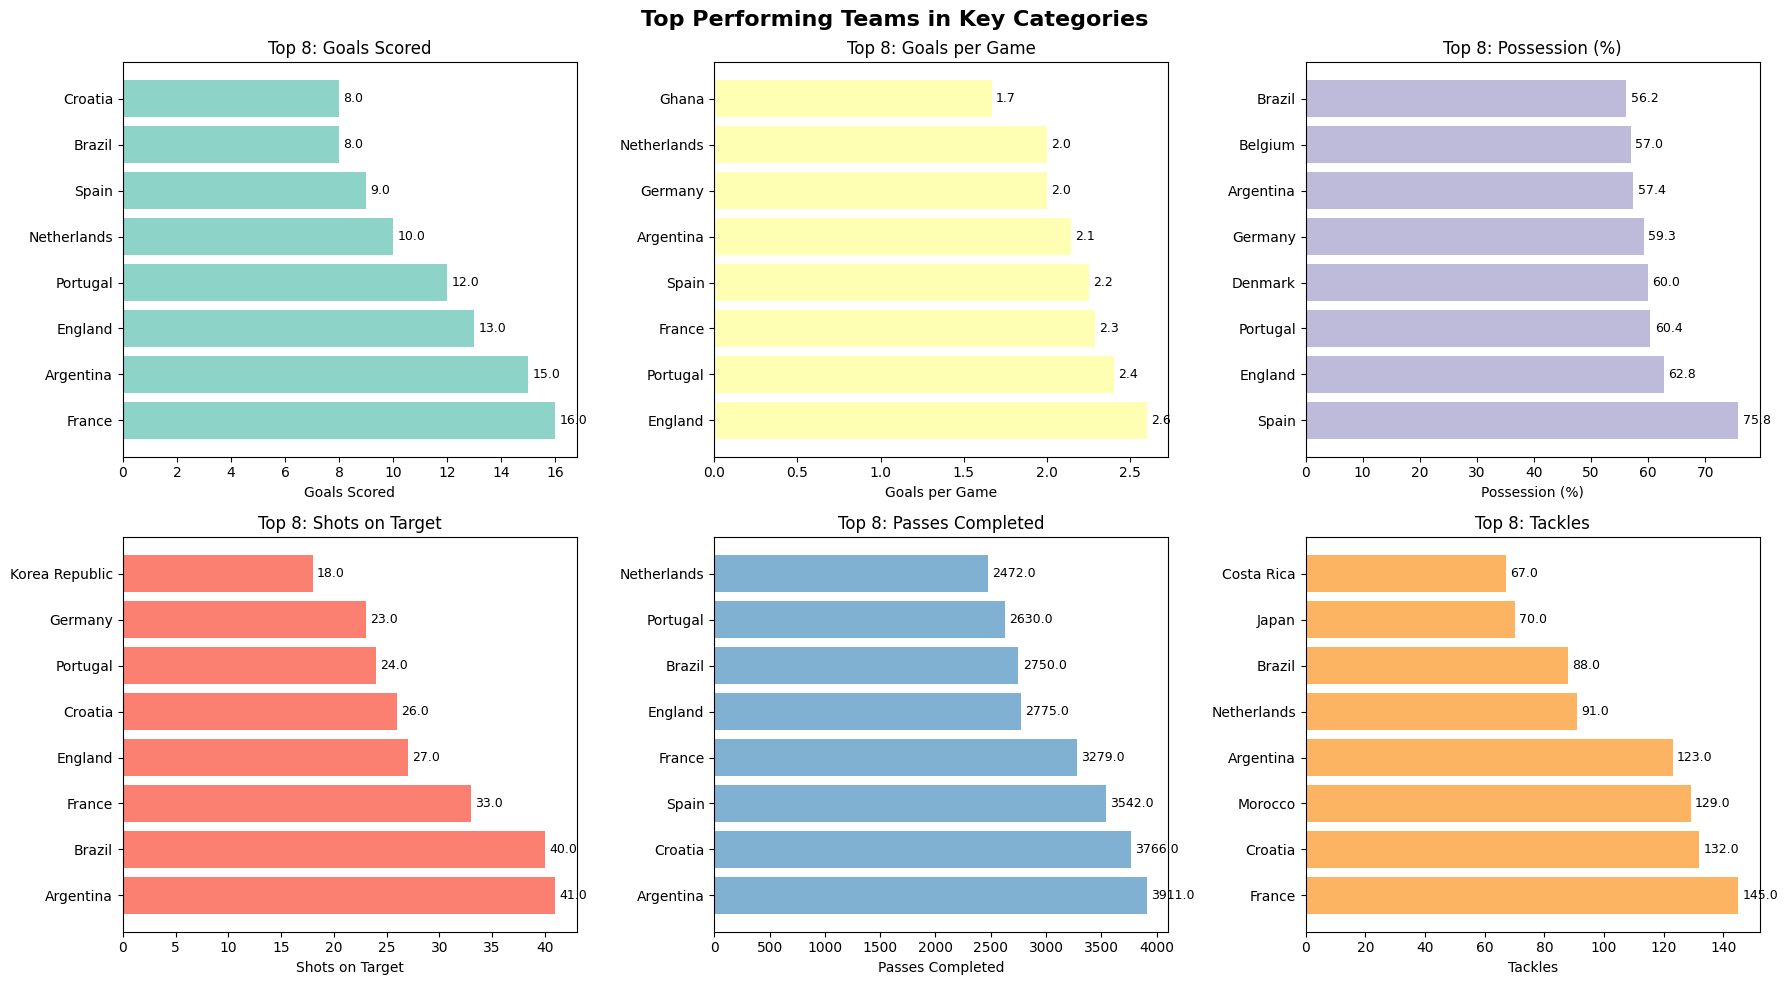


2. PERFORMANCE DISTRIBUTION ANALYSIS:
-----------------------------------


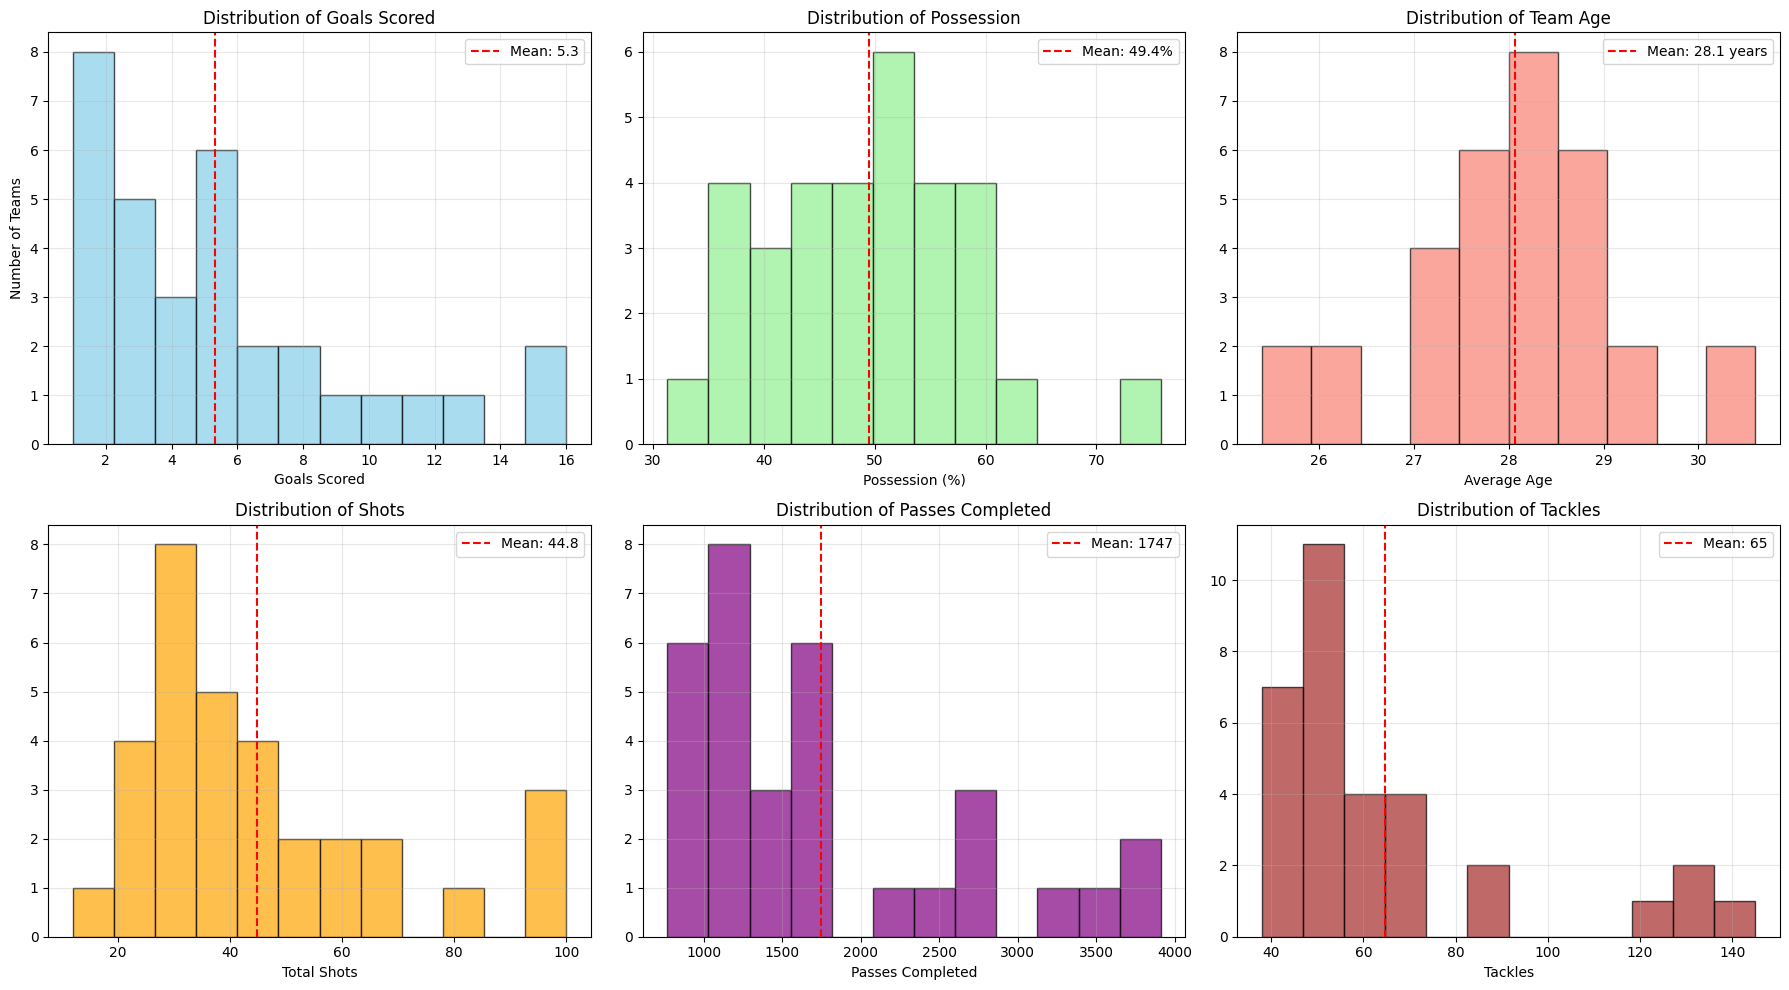


3. KEY PERFORMANCE METRICS SUMMARY:
-----------------------------------
       goals  possession   shots  shots_on_target  passes_completed  tackles  \
count  32.00       32.00   32.00            32.00             32.00    32.00   
mean    5.31       49.44   44.78            15.00           1746.56    64.75   
std     4.13        9.46   22.56             9.67            913.51    28.83   
min     1.00       31.30   12.00             4.00            769.00    38.00   
25%     2.75       42.75   29.00             8.00           1121.00    47.75   
50%     4.50       50.15   36.00            12.00           1317.00    53.00   
75%     6.50       54.78   53.50            17.25           2320.50    66.25   
max    16.00       75.80  100.00            41.00           3911.00   145.00   

       avg_age  
count    32.00  
mean     28.06  
std       1.17  
min      25.40  
25%      27.48  
50%      28.10  
75%      28.72  
max      30.60  


In [6]:
# Creating performance metrics per game
df['goals_per_game'] = df['goals'] / df['games']
df['shots_per_game'] = df['shots'] / df['games']
df['passes_per_game'] = df['passes_completed'] / df['games']
df['tackles_per_game'] = df['tackles'] / df['games']

# 1.1 Basic tournament statistics
print("1. TOURNAMENT OVERVIEW STATISTICS:")
print("-" * 35)
print(f"Total teams analyzed: {len(df)}")
print(f"Total goals scored: {df['goals'].sum()}")
print(f"Average goals per team: {df['goals'].mean():.1f}")
print(f"Average possession: {df['possession'].mean():.1f}%")
print(f"Average team age: {df['avg_age'].mean():.1f} years")

# 1.2 Top performers in key categories - FIXED
categories = {
    'goals': 'Goals Scored',
    'goals_per_game': 'Goals per Game',
    'possession': 'Possession (%)',
    'shots_on_target': 'Shots on Target',
    'passes_completed': 'Passes Completed',
    'tackles': 'Tackles'
}

n_categories = len(categories)
n_cols = 3
n_rows = (n_categories + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
fig.suptitle('Top Performing Teams in Key Categories', fontsize=16, fontweight='bold')

if n_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes] if n_cols == 1 else axes

for i, (col, title) in enumerate(categories.items()):
    if col in df.columns:
        ax = axes[i]
        top_teams = df.nlargest(8, col)[['team', col]]

        bars = ax.barh(top_teams['team'], top_teams[col], color=plt.cm.Set3(i))
        ax.set_xlabel(title)
        ax.set_title(f'Top 8: {title}')

        for bar in bars:
            width = bar.get_width()
            ax.text(width + max(top_teams[col])*0.01, bar.get_y() + bar.get_height()/2,
                   f'{width:.1f}', ha='left', va='center', fontsize=9)

for i in range(n_categories, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# 1.3 Performance distribution analysis
print("\n2. PERFORMANCE DISTRIBUTION ANALYSIS:")
print("-" * 35)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Goals distribution
axes[0,0].hist(df['goals'], bins=12, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['goals'].mean(), color='red', linestyle='--', label=f'Mean: {df["goals"].mean():.1f}')
axes[0,0].set_xlabel('Goals Scored')
axes[0,0].set_ylabel('Number of Teams')
axes[0,0].set_title('Distribution of Goals Scored')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# Possession distribution
axes[0,1].hist(df['possession'], bins=12, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].axvline(df['possession'].mean(), color='red', linestyle='--', label=f'Mean: {df["possession"].mean():.1f}%')
axes[0,1].set_xlabel('Possession (%)')
axes[0,1].set_title('Distribution of Possession')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)

# Age distribution
axes[0,2].hist(df['avg_age'], bins=10, alpha=0.7, color='salmon', edgecolor='black')
axes[0,2].axvline(df['avg_age'].mean(), color='red', linestyle='--', label=f'Mean: {df["avg_age"].mean():.1f} years')
axes[0,2].set_xlabel('Average Age')
axes[0,2].set_title('Distribution of Team Age')
axes[0,2].legend()
axes[0,2].grid(alpha=0.3)

# Shots distribution
axes[1,0].hist(df['shots'], bins=12, alpha=0.7, color='orange', edgecolor='black')
axes[1,0].axvline(df['shots'].mean(), color='red', linestyle='--', label=f'Mean: {df["shots"].mean():.1f}')
axes[1,0].set_xlabel('Total Shots')
axes[1,0].set_title('Distribution of Shots')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)

# Passes distribution
axes[1,1].hist(df['passes_completed'], bins=12, alpha=0.7, color='purple', edgecolor='black')
axes[1,1].axvline(df['passes_completed'].mean(), color='red', linestyle='--', label=f'Mean: {df["passes_completed"].mean():.0f}')
axes[1,1].set_xlabel('Passes Completed')
axes[1,1].set_title('Distribution of Passes Completed')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

# Tackles distribution
axes[1,2].hist(df['tackles'], bins=12, alpha=0.7, color='brown', edgecolor='black')
axes[1,2].axvline(df['tackles'].mean(), color='red', linestyle='--', label=f'Mean: {df["tackles"].mean():.0f}')
axes[1,2].set_xlabel('Tackles')
axes[1,2].set_title('Distribution of Tackles')
axes[1,2].legend()
axes[1,2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 1.4 Summary statistics table
print("\n3. KEY PERFORMANCE METRICS SUMMARY:")
print("-" * 35)

summary_stats = df[['goals', 'possession', 'shots', 'shots_on_target', 'passes_completed', 'tackles', 'avg_age']].describe()
print(summary_stats.round(2))

# Goals vs Possession

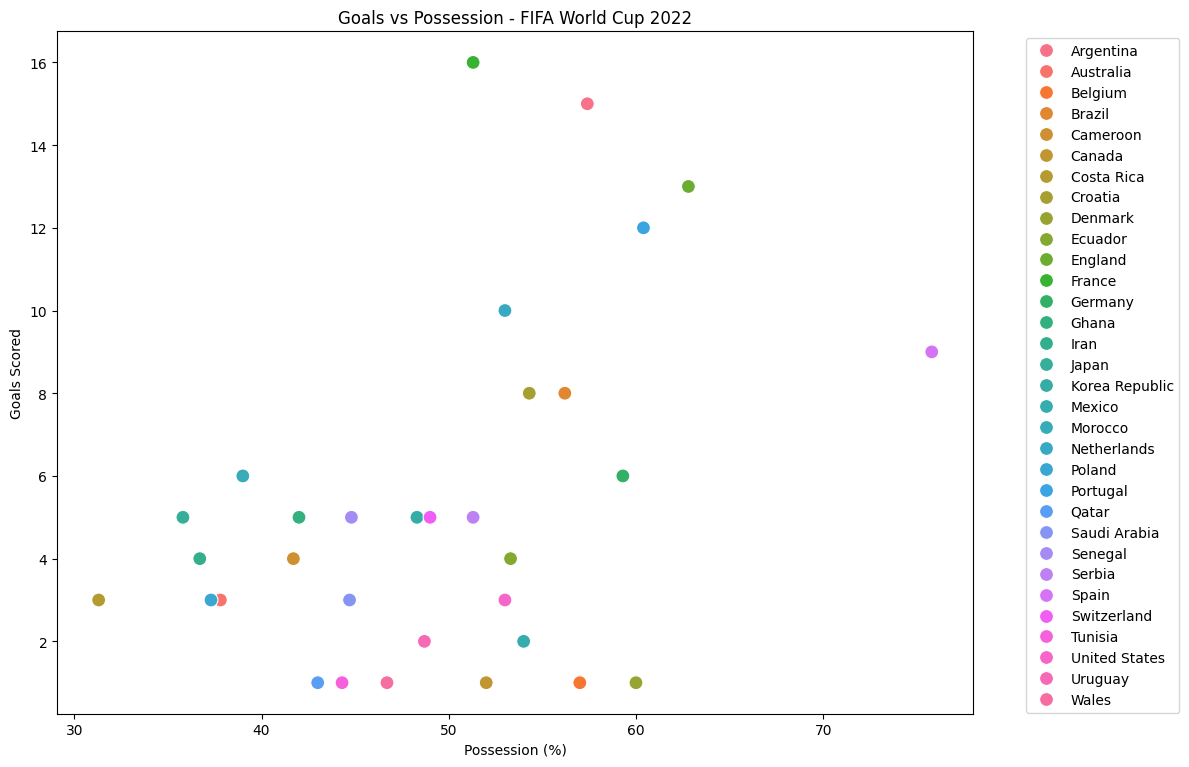

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='possession', y='goals', hue='team', s=100)
plt.title('Goals vs Possession - FIFA World Cup 2022')
plt.xlabel('Possession (%)')
plt.ylabel('Goals Scored')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Find Goal and Shot-Related Columns

In [8]:
goal_columns = [col for col in df.columns if 'goal' in col.lower()]
against_columns = [col for col in df.columns if 'against' in col.lower()]
shot_columns = [col for col in df.columns if 'shot' in col.lower()]

print("Goal-related columns:", goal_columns)
print("Against-related columns:", against_columns)
print("Shot-related columns:", shot_columns)

Goal-related columns: ['goals', 'goals_pens', 'goals_per90', 'gk_goals_against', 'gk_goals_against_per90', 'goals_per_shot', 'goals_per_shot_on_target', 'on_goals_for', 'on_goals_against', 'goal_difference', 'own_goals', 'goals_per_game']
Against-related columns: ['gk_goals_against', 'gk_goals_against_per90', 'gk_shots_on_target_against', 'on_goals_against', 'on_xg_against']
Shot-related columns: ['gk_shots_on_target_against', 'shots', 'shots_on_target', 'shots_per90', 'shots_on_target_per90', 'goals_per_shot', 'goals_per_shot_on_target', 'average_shot_distance', 'blocked_shots', 'shots_per_game']


# Team Performance Metrics and Top Performers

In [9]:
# Creating performance metrics per game (since teams played different number of games)
df['goals_per_game'] = df['goals'] / df['games']
df['shots_per_game'] = df['shots'] / df['games']
df['passes_per_game'] = df['passes_completed'] / df['games']
df['tackles_per_game'] = df['tackles'] / df['games']

# Top performers per key metric
metrics = ['goals_per_game', 'shots_per_game', 'passes_per_game', 'tackles_per_game', 'possession']

print("TOP PERFORMING TEAMS BY KEY METRICS:")
print("="*50)

for metric in metrics:
    top_5 = df.nlargest(5, metric)[['team', metric, 'games']]
    print(f"\nTop 5 in {metric.replace('_', ' ').title()}:")
    print(top_5.to_string(index=False))

TOP PERFORMING TEAMS BY KEY METRICS:

Top 5 in Goals Per Game:
     team  goals_per_game  games
  England        2.600000      5
 Portugal        2.400000      5
   France        2.285714      7
    Spain        2.250000      4
Argentina        2.142857      7

Top 5 in Shots Per Game:
     team  shots_per_game  games
  Germany       22.666667      3
   Brazil       19.000000      5
   France       14.285714      7
   Mexico       13.666667      3
Argentina       13.571429      7

Top 5 in Passes Per Game:
     team  passes_per_game  games
    Spain       885.500000      4
  Germany       562.000000      3
Argentina       558.714286      7
  England       555.000000      5
   Brazil       550.000000      5

Top 5 in Tackles Per Game:
      team  tackles_per_game  games
Costa Rica         22.333333      3
   Tunisia         21.333333      3
    France         20.714286      7
   Croatia         18.857143      7
   Morocco         18.428571      7

Top 5 in Possession:
    team  possessi

# Top teams by overall performance score

In [10]:
# Combining multiple metrics into a single performance score
performance_metrics = ['goals_per_game', 'shots_on_target_per90', 'passes_completed', 'tackles_won', 'possession']

# Standardize and weight each metric
weights = [0.3, 0.2, 0.15, 0.2, 0.15]  # Fact: Goals are the most important

df['performance_score'] = 0
for i, metric in enumerate(performance_metrics):
    if metric in df.columns:
        normalized = (df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())
        df['performance_score'] += normalized * weights[i]

print("TOP TEAMS BY OVERALL PERFORMANCE SCORE:")
top_performers = df.nlargest(10, 'performance_score')[['team', 'performance_score', 'games', 'goals_per_game']]
print(top_performers.to_string(index=False))

TOP TEAMS BY OVERALL PERFORMANCE SCORE:
       team  performance_score  games  goals_per_game
  Argentina           0.749317      7        2.142857
     France           0.746893      7        2.285714
    England           0.701819      5        2.600000
      Spain           0.647367      4        2.250000
   Portugal           0.641644      5        2.400000
     Brazil           0.632034      5        1.600000
    Croatia           0.579709      7        1.142857
    Germany           0.579336      3        2.000000
Netherlands           0.508965      5        2.000000
    Morocco           0.373804      7        0.857143


# Team Age Insights: Youngest & Oldest Teams, Correlations, and Visualizations

Overall Average Team Age: 28.1 years
Youngest Team: United States (25.4 years)
Oldest Team: Belgium (30.6 years)

Top 5 Youngest Teams:
         team  avg_age  goals_per_game
United States     25.4        0.750000
      Ecuador     25.8        1.333333
        Ghana     26.4        1.666667
        Spain     26.4        2.250000
      England     27.0        2.600000

Top 5 Oldest Teams:
          team  avg_age  goals_per_game
       Belgium     30.6        0.333333
    Costa Rica     30.6        1.000000
          Iran     29.3        1.333333
       Croatia     29.2        1.142857
Korea Republic     29.0        1.250000


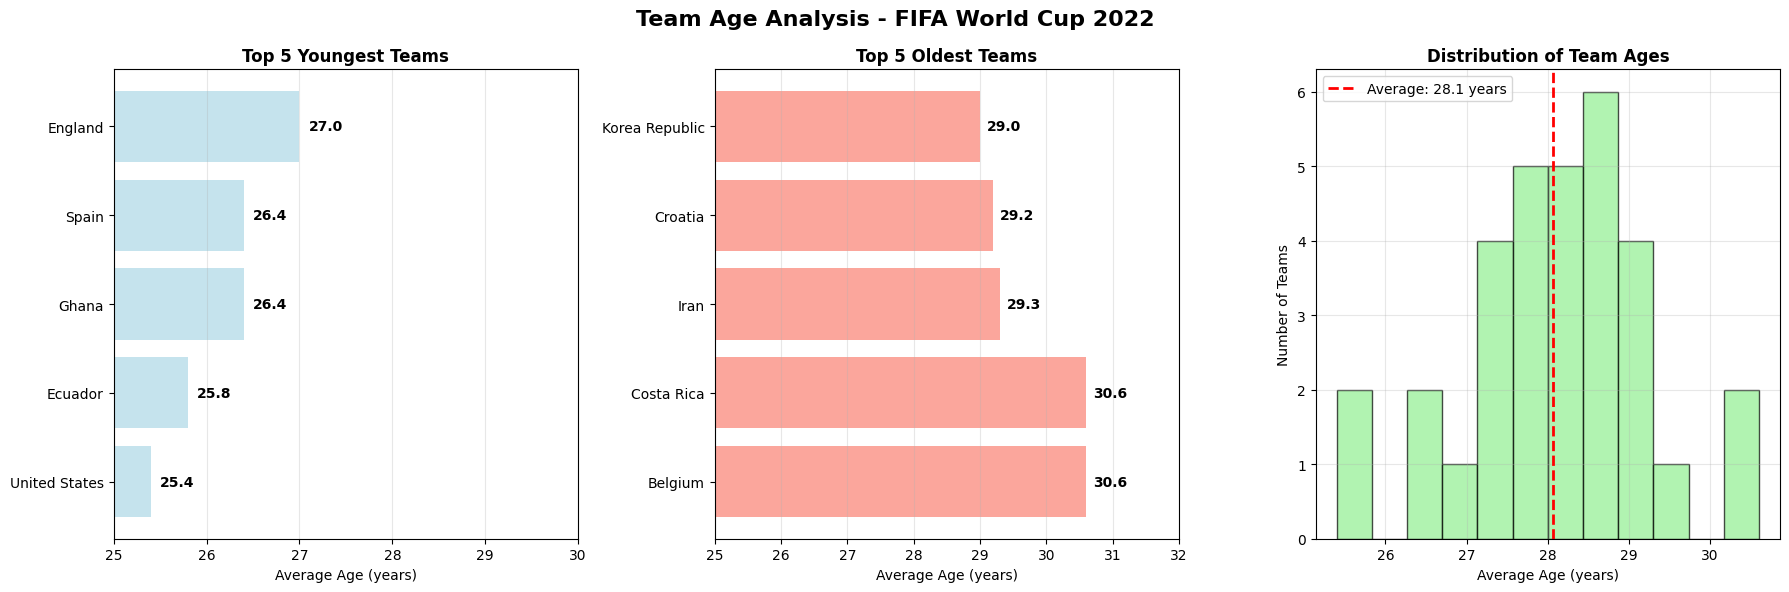


AGE VS PERFORMANCE ANALYSIS:
------------------------------
Correlation between Age and Goals/Game: -0.320
Average Goals/Game for 5 Youngest Teams: 1.72
Average Goals/Game for 5 Oldest Teams: 1.01
Performance Difference: 0.71 goals/game


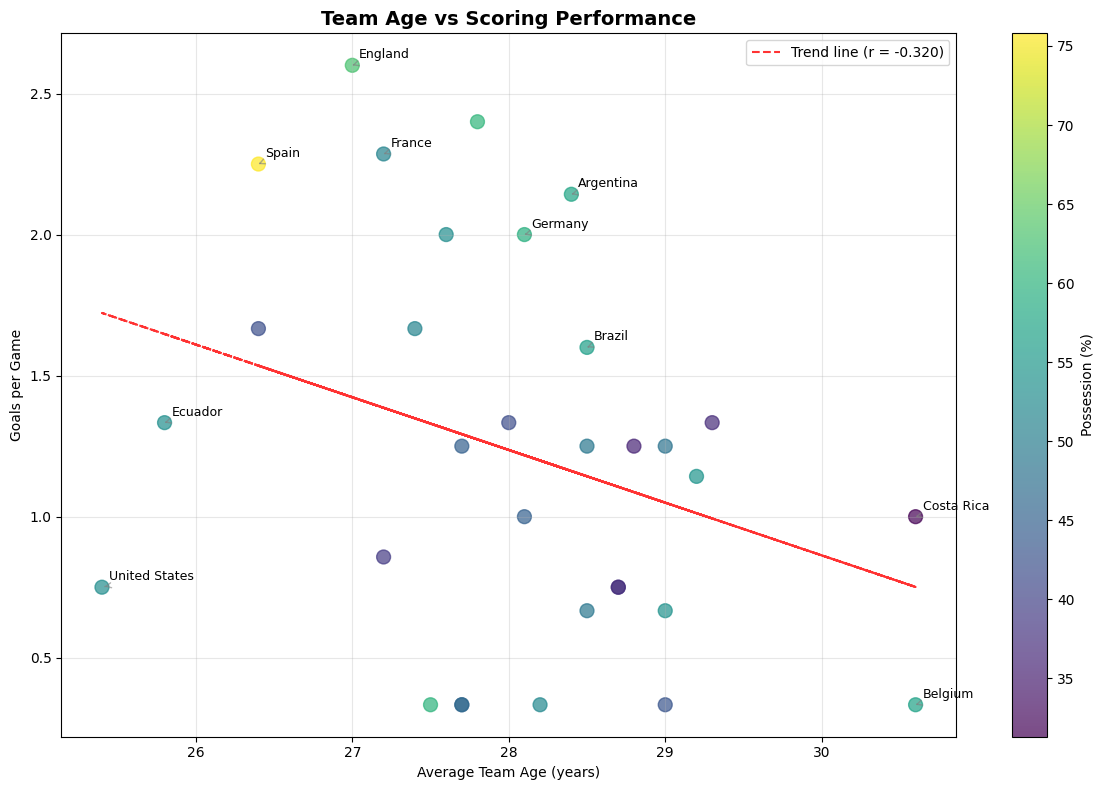


SUMMARY OF AGE ANALYSIS:
-------------------------
Age Range: 25.4 - 30.6 years
Standard Deviation: 1.17 years
Median Age: 28.1 years

Age Categories:
Young Teams (<27 years): 4 teams
Middle-aged Teams (27-29 years): 24 teams
Older Teams (>29 years): 4 teams


In [11]:
# Calculate overall average age
overall_avg_age = df['avg_age'].mean()
print(f"Overall Average Team Age: {overall_avg_age:.1f} years")
print(f"Youngest Team: {df.loc[df['avg_age'].idxmin(), 'team']} ({df['avg_age'].min():.1f} years)")
print(f"Oldest Team: {df.loc[df['avg_age'].idxmax(), 'team']} ({df['avg_age'].max():.1f} years)")

# Get top 5 youngest and oldest teams
youngest_teams = df.nsmallest(5, 'avg_age')[['team', 'avg_age', 'goals_per_game']]
oldest_teams = df.nlargest(5, 'avg_age')[['team', 'avg_age', 'goals_per_game']]

print("\nTop 5 Youngest Teams:")
print(youngest_teams.to_string(index=False))
print("\nTop 5 Oldest Teams:")
print(oldest_teams.to_string(index=False))

# Create visualizations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Team Age Analysis - FIFA World Cup 2022', fontsize=16, fontweight='bold')

# Plot 1: Top 5 youngest teams
bars1 = ax1.barh(youngest_teams['team'], youngest_teams['avg_age'], color='lightblue', alpha=0.7)
ax1.set_xlabel('Average Age (years)')
ax1.set_title('Top 5 Youngest Teams', fontweight='bold')
ax1.set_xlim(25, 30)
ax1.grid(axis='x', alpha=0.3)

for bar in bars1:
    width = bar.get_width()
    ax1.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}', ha='left', va='center', fontweight='bold')

# Plot 2: Top 5 oldest teams
bars2 = ax2.barh(oldest_teams['team'], oldest_teams['avg_age'], color='salmon', alpha=0.7)
ax2.set_xlabel('Average Age (years)')
ax2.set_title('Top 5 Oldest Teams', fontweight='bold')
ax2.set_xlim(25, 32)
ax2.grid(axis='x', alpha=0.3)

for bar in bars2:
    width = bar.get_width()
    ax2.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}', ha='left', va='center', fontweight='bold')

# Plot 3: Age distribution across all teams
ax3.hist(df['avg_age'], bins=12, alpha=0.7, color='lightgreen', edgecolor='black')
ax3.axvline(overall_avg_age, color='red', linestyle='--', linewidth=2,
           label=f'Average: {overall_avg_age:.1f} years')
ax3.set_xlabel('Average Age (years)')
ax3.set_ylabel('Number of Teams')
ax3.set_title('Distribution of Team Ages', fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis: Age vs Performance
print("\nAGE VS PERFORMANCE ANALYSIS:")
print("-" * 30)

# Calculate correlation between age and goals
age_goal_corr = df['avg_age'].corr(df['goals_per_game'])
print(f"Correlation between Age and Goals/Game: {age_goal_corr:.3f}")

# Compare performance of youngest vs oldest teams
young_avg_goals = youngest_teams['goals_per_game'].mean()
old_avg_goals = oldest_teams['goals_per_game'].mean()

print(f"Average Goals/Game for 5 Youngest Teams: {young_avg_goals:.2f}")
print(f"Average Goals/Game for 5 Oldest Teams: {old_avg_goals:.2f}")
print(f"Performance Difference: {young_avg_goals - old_avg_goals:.2f} goals/game")

# Create scatter plot: Age vs Performance
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['avg_age'], df['goals_per_game'], alpha=0.7, s=100,
                     c=df['possession'], cmap='viridis')

plt.xlabel('Average Team Age (years)')
plt.ylabel('Goals per Game')
plt.title('Team Age vs Scoring Performance', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Possession (%)')
plt.grid(alpha=0.3)

notable_teams = ['Argentina', 'France', 'England', 'Spain', 'Brazil', 'Germany',
                'United States', 'Ecuador', 'Belgium', 'Costa Rica']

for i, team in enumerate(df['team']):
    if team in notable_teams:
        plt.annotate(team, (df['avg_age'].iloc[i], df['goals_per_game'].iloc[i]),
                    xytext=(5, 5), textcoords='offset points', fontsize=9,
                    arrowprops=dict(arrowstyle='->', color='gray', alpha=0.6))

z = np.polyfit(df['avg_age'], df['goals_per_game'], 1)
p = np.poly1d(z)
plt.plot(df['avg_age'], p(df['avg_age']), "r--", alpha=0.8,
         label=f'Trend line (r = {age_goal_corr:.3f})')
plt.legend()

plt.tight_layout()
plt.show()

# Summary table of age analysis
print("\nSUMMARY OF AGE ANALYSIS:")
print("-" * 25)
age_summary = df['avg_age'].describe()
print(f"Age Range: {df['avg_age'].min():.1f} - {df['avg_age'].max():.1f} years")
print(f"Standard Deviation: {df['avg_age'].std():.2f} years")
print(f"Median Age: {df['avg_age'].median():.1f} years")

# Teams by age categories
young_teams = df[df['avg_age'] < 27]['team'].tolist()
middle_teams = df[(df['avg_age'] >= 27) & (df['avg_age'] <= 29)]['team'].tolist()
old_teams = df[df['avg_age'] > 29]['team'].tolist()

print(f"\nAge Categories:")
print(f"Young Teams (<27 years): {len(young_teams)} teams")
print(f"Middle-aged Teams (27-29 years): {len(middle_teams)} teams")
print(f"Older Teams (>29 years): {len(old_teams)} teams")

# Team Age vs Performance: Exploratory Analysis

<Figure size 1200x800 with 0 Axes>

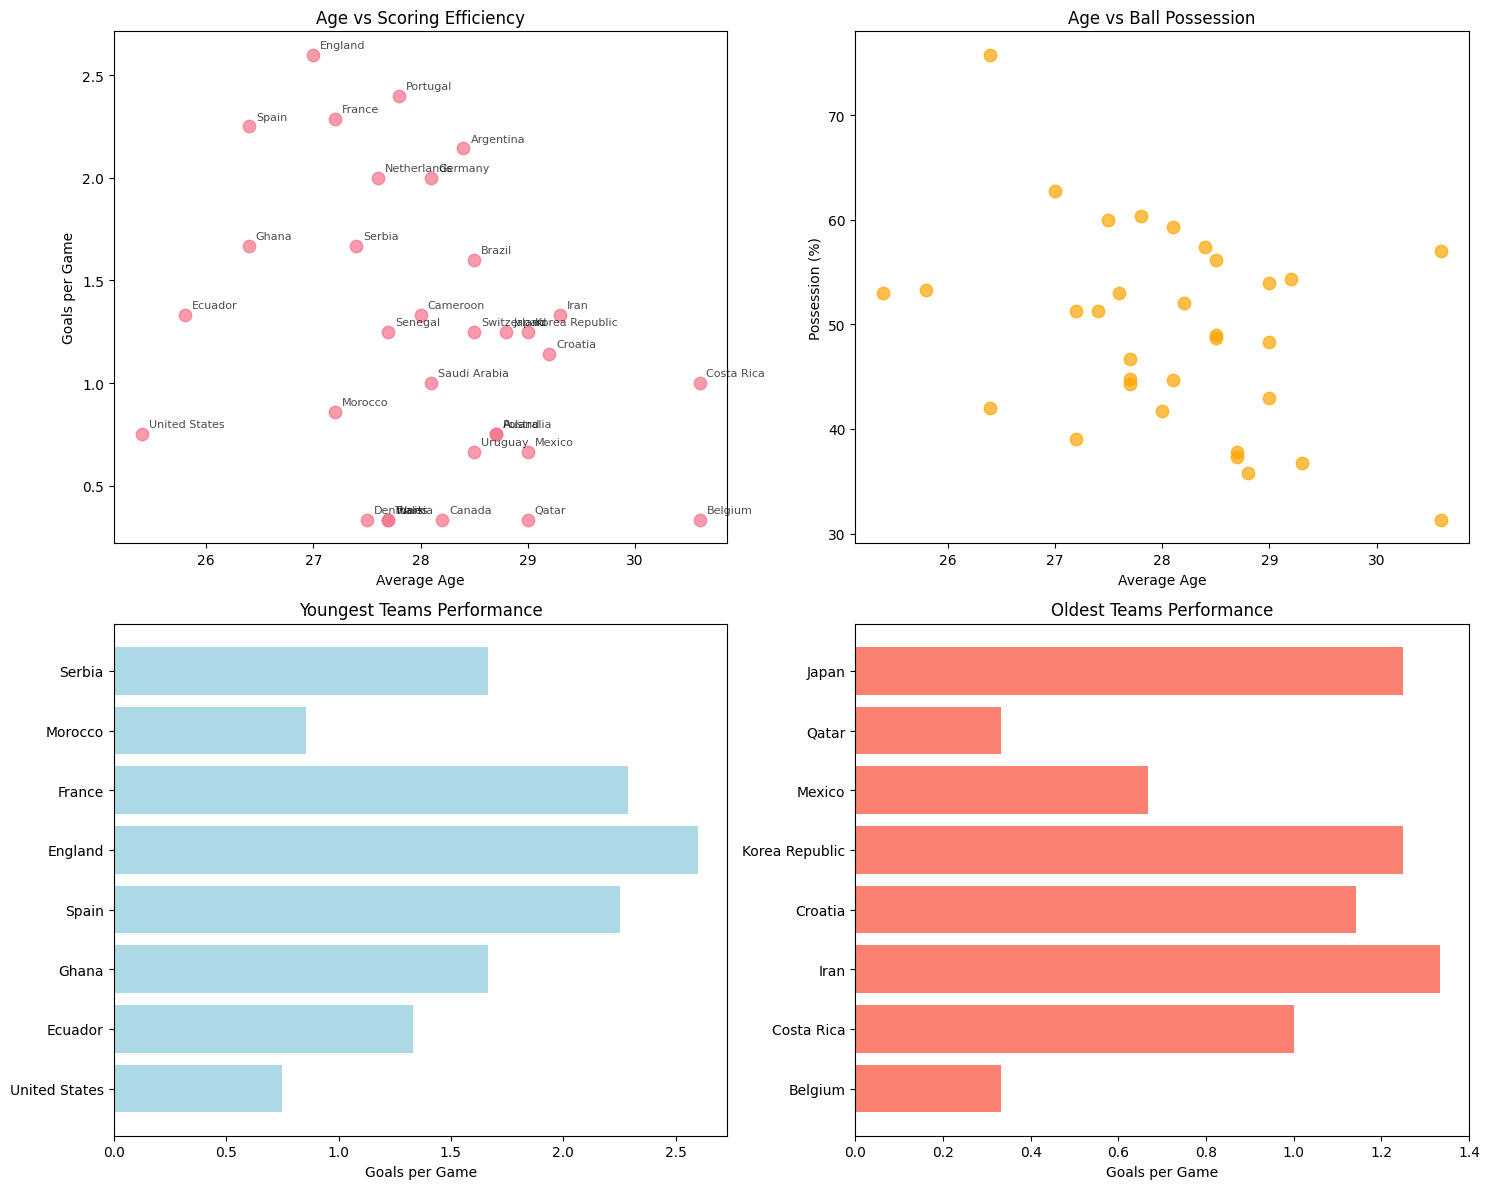

Correlation between Age and Performance Metrics:
avg_age              1.000000
goals_per_game      -0.320061
possession          -0.358438
performance_score   -0.272892
Name: avg_age, dtype: float64


In [12]:
plt.figure(figsize=(12, 8))

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Age vs Goals per game
axes[0,0].scatter(df['avg_age'], df['goals_per_game'], alpha=0.7, s=80)
axes[0,0].set_xlabel('Average Age')
axes[0,0].set_ylabel('Goals per Game')
axes[0,0].set_title('Age vs Scoring Efficiency')
for i, team in enumerate(df['team']):
    axes[0,0].annotate(team, (df['avg_age'].iloc[i], df['goals_per_game'].iloc[i]),
                      xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)

# Plot 2: Age vs Possession
axes[0,1].scatter(df['avg_age'], df['possession'], alpha=0.7, s=80, color='orange')
axes[0,1].set_xlabel('Average Age')
axes[0,1].set_ylabel('Possession (%)')
axes[0,1].set_title('Age vs Ball Possession')

# Plot 3: Youngest teams
young_teams = df.nsmallest(8, 'avg_age')[['team', 'avg_age', 'goals_per_game']]
axes[1,0].barh(young_teams['team'], young_teams['goals_per_game'], color='lightblue')
axes[1,0].set_xlabel('Goals per Game')
axes[1,0].set_title('Youngest Teams Performance')

# Plot 4: Oldest teams
old_teams = df.nlargest(8, 'avg_age')[['team', 'avg_age', 'goals_per_game']]
axes[1,1].barh(old_teams['team'], old_teams['goals_per_game'], color='salmon')
axes[1,1].set_xlabel('Goals per Game')
axes[1,1].set_title('Oldest Teams Performance')

plt.tight_layout()
plt.show()

# Correlation between age and performance
age_corr = df[['avg_age', 'goals_per_game', 'possession', 'performance_score']].corr()
print("Correlation between Age and Performance Metrics:")
print(age_corr['avg_age'])

# Age Impact Summary: Youngest vs Oldest Teams

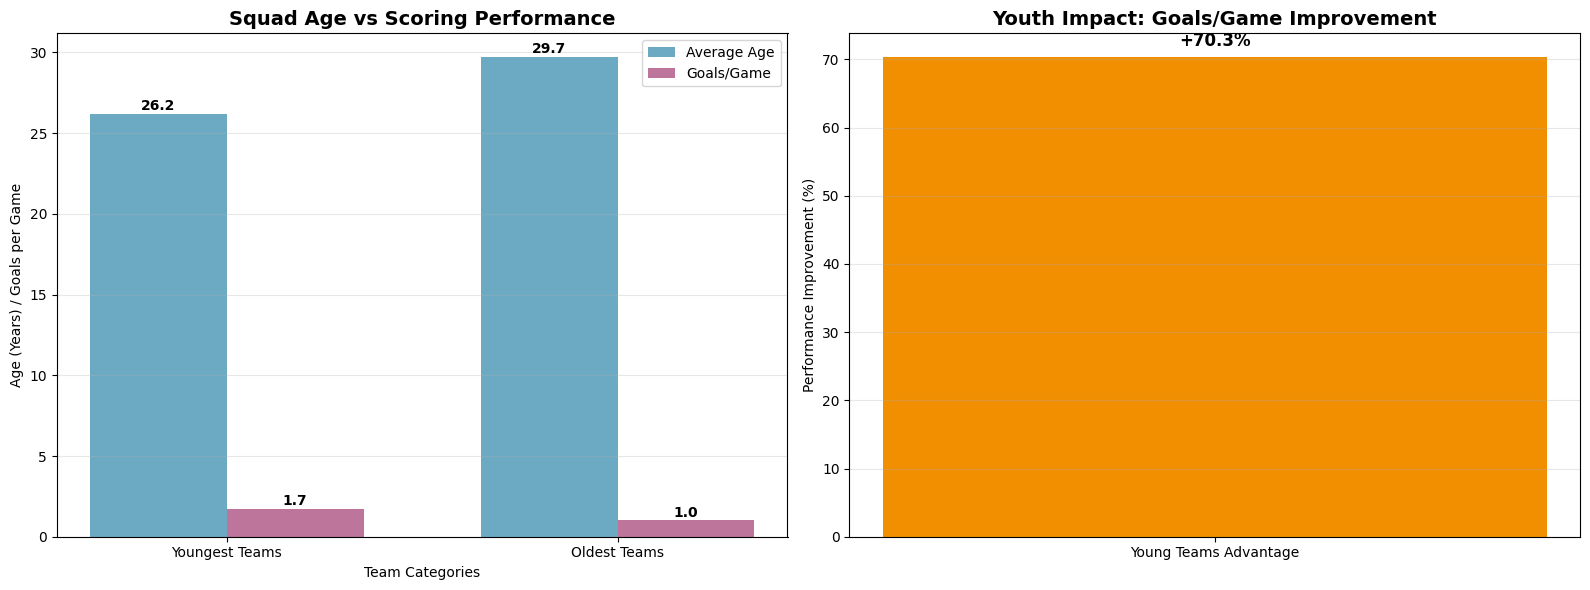

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Age vs Goals correlation
young_teams_age = 26.2
young_teams_goals = 1.72
old_teams_age = 29.7
old_teams_goals = 1.01

age_groups = ['Youngest Teams', 'Oldest Teams']
ages = [young_teams_age, old_teams_age]
goals = [young_teams_goals, old_teams_goals]

x = np.arange(len(age_groups))
width = 0.35

bars1 = ax1.bar(x - width/2, ages, width, label='Average Age', color='#2E86AB', alpha=0.7)
bars2 = ax1.bar(x + width/2, goals, width, label='Goals/Game', color='#A23B72', alpha=0.7)

ax1.set_xlabel('Team Categories')
ax1.set_ylabel('Age (Years) / Goals per Game')
ax1.set_title('Squad Age vs Scoring Performance', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(age_groups)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Age impact summary
improvement = ((young_teams_goals - old_teams_goals) / old_teams_goals) * 100

categories = ['Young Teams Advantage']
values = [improvement]

bars = ax2.bar(categories, values, color='#F18F01')
ax2.set_ylabel('Performance Improvement (%)')
ax2.set_title('Youth Impact: Goals/Game Improvement', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

for bar, value in zip(bars, values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'+{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# Offensive - Defensive Analysis

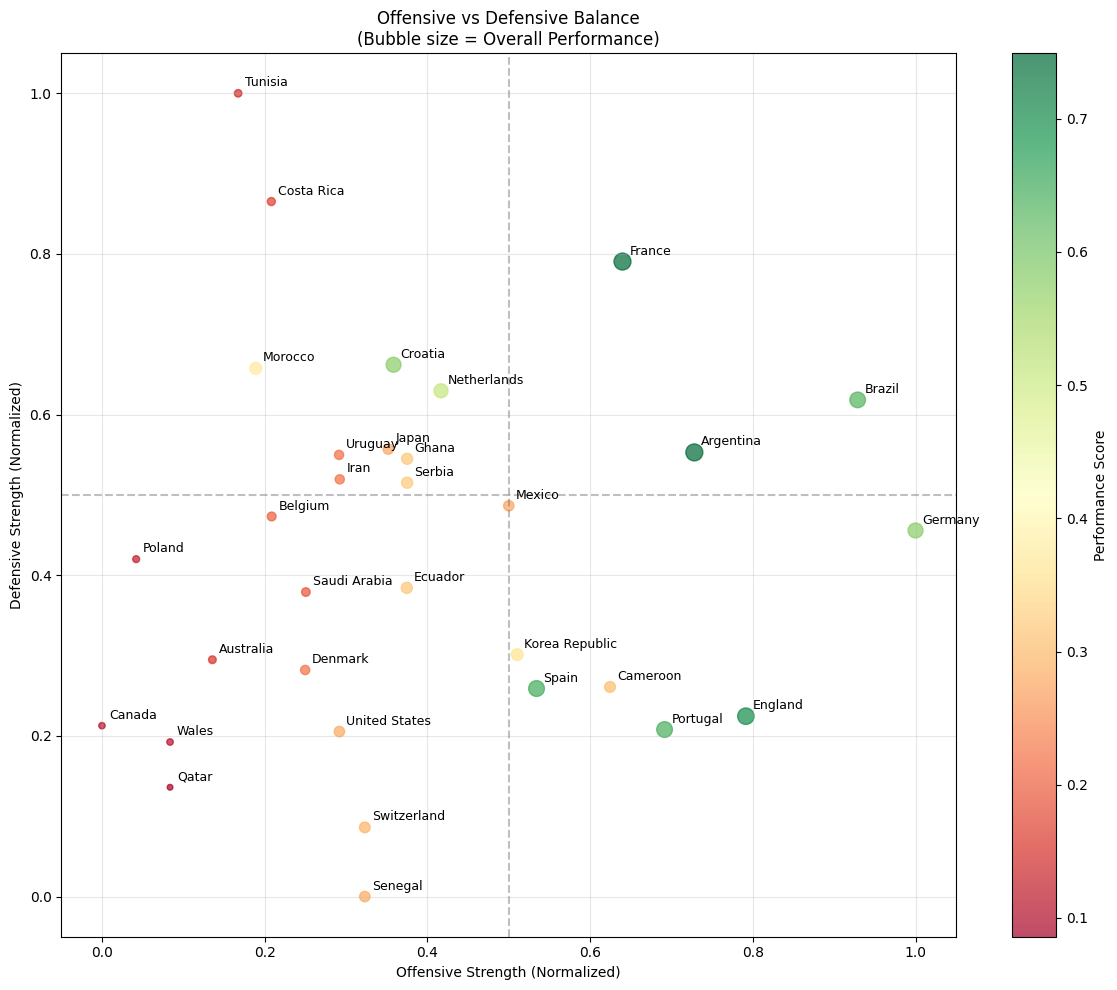


MOST BALANCED TEAMS (Good at both offense and defense):
         team  balance_score  offensive_strength_norm  defensive_strength_norm
      Ecuador       0.990404                 0.374688                 0.384283
       Mexico       0.986516                 0.500000                 0.486516
      Denmark       0.967741                 0.249792                 0.282051
        Qatar       0.947628                 0.083680                 0.136052
United States       0.913537                 0.291840                 0.205377


In [14]:
# Analyzing defensive-offensive balance
df['offensive_strength'] = (df['goals_per_game'] + df['shots_on_target_per90']) / 2
df['defensive_strength'] = (1/df['gk_goals_against_per90'] + df['tackles_per_game']) / 2  # Inverse of goals against

# Normalize strengths
df['offensive_strength_norm'] = (df['offensive_strength'] - df['offensive_strength'].min()) / (df['offensive_strength'].max() - df['offensive_strength'].min())
df['defensive_strength_norm'] = (df['defensive_strength'] - df['defensive_strength'].min()) / (df['defensive_strength'].max() - df['defensive_strength'].min())

# Plot offensive vs defensive strength
plt.figure(figsize=(12, 10))
plt.scatter(df['offensive_strength_norm'], df['defensive_strength_norm'],
           s=df['performance_score']*200, alpha=0.7, c=df['performance_score'], cmap='RdYlGn')

plt.xlabel('Offensive Strength (Normalized)')
plt.ylabel('Defensive Strength (Normalized)')
plt.title('Offensive vs Defensive Balance\n(Bubble size = Overall Performance)')

for i, team in enumerate(df['team']):
    plt.annotate(team, (df['offensive_strength_norm'].iloc[i], df['defensive_strength_norm'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.colorbar(label='Performance Score')
plt.tight_layout()
plt.show()

# Identify balanced teams
df['balance_score'] = 1 - abs(df['offensive_strength_norm'] - df['defensive_strength_norm'])
balanced_teams = df.nlargest(5, 'balance_score')[['team', 'balance_score', 'offensive_strength_norm', 'defensive_strength_norm']]
print("\nMOST BALANCED TEAMS (Good at both offense and defense):")
print(balanced_teams.to_string(index=False))

# Goalkeeper Performance Analysis

Goalkeeper Performance Rankings:
-----------------------------------


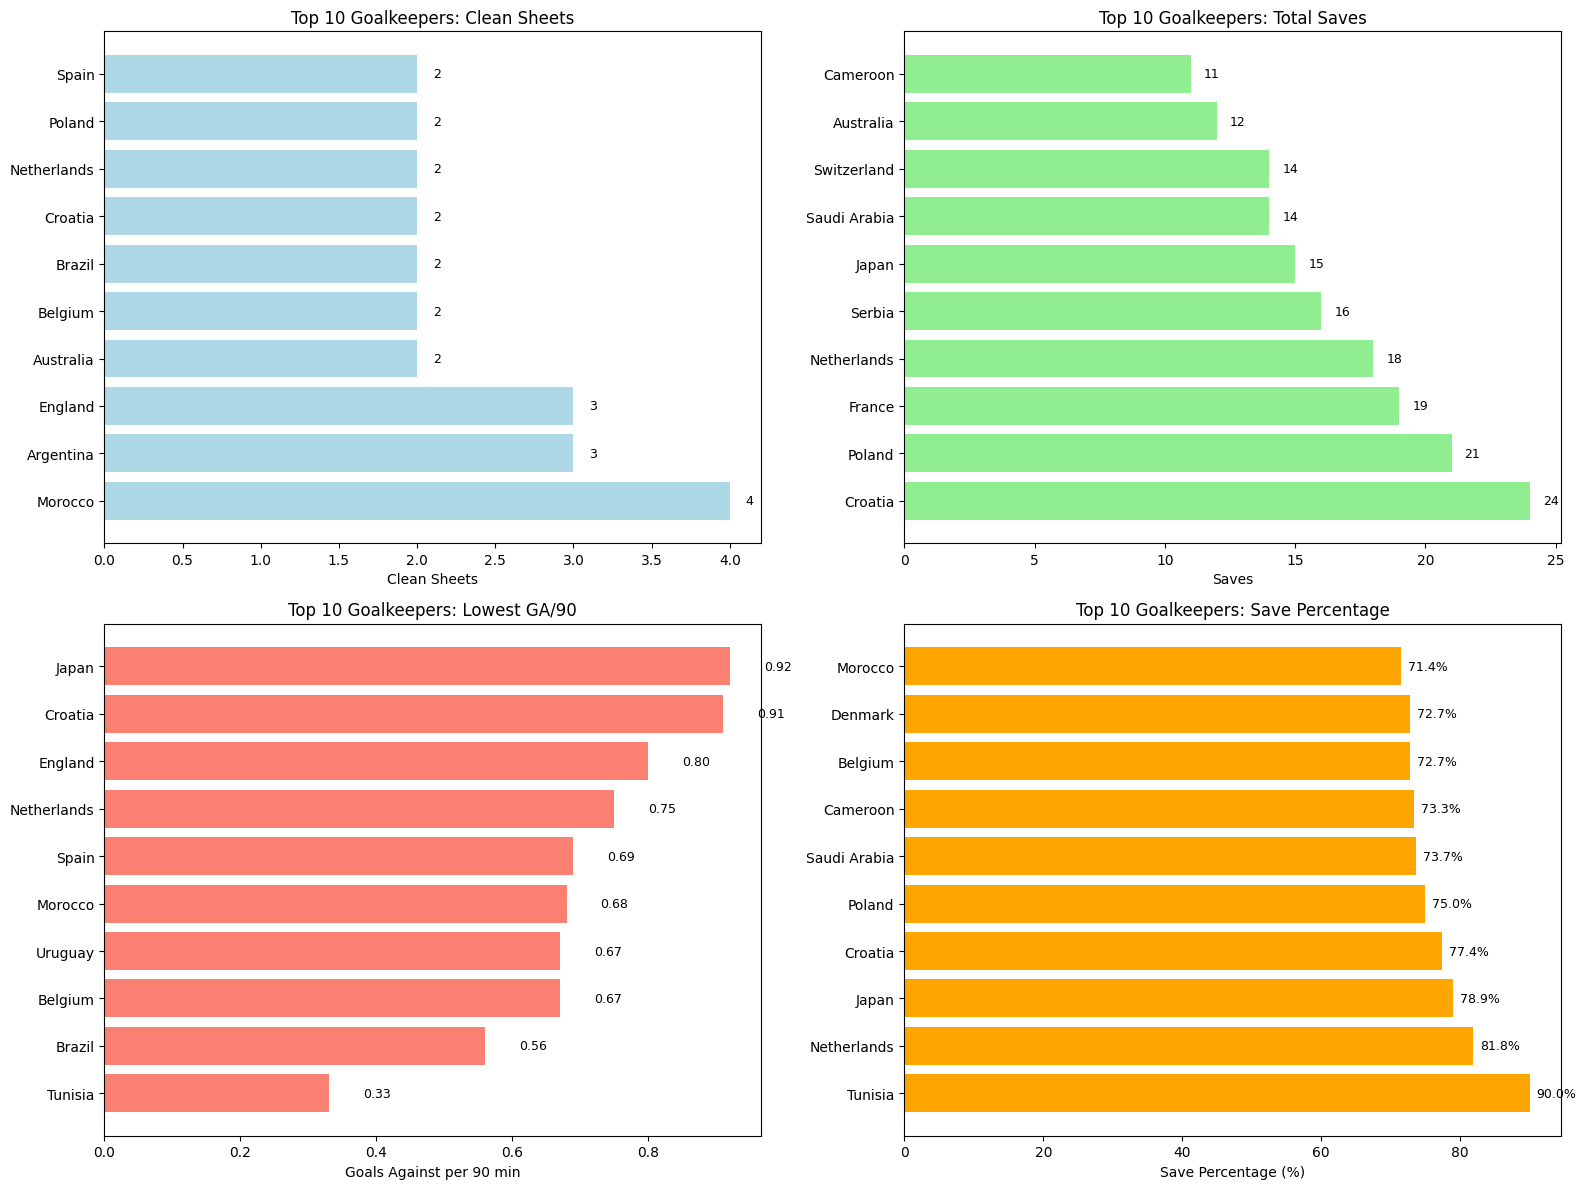


Goalkeeper Impact on Team Success:
-----------------------------------
Goalkeepers with Highest Impact:
     team  gk_contribution  gk_goals_against_per90  gk_clean_sheets
  Tunisia            6.061                    0.33                2
  Morocco            5.882                    0.68                4
  England            3.750                    0.80                3
   Brazil            3.571                    0.56                2
  Belgium            2.985                    0.67                2
  Uruguay            2.985                    0.67                2
    Spain            2.899                    0.69                2
Argentina            2.885                    1.04                3

Correlation between GA/90 and Team Goals/Game: -0.103


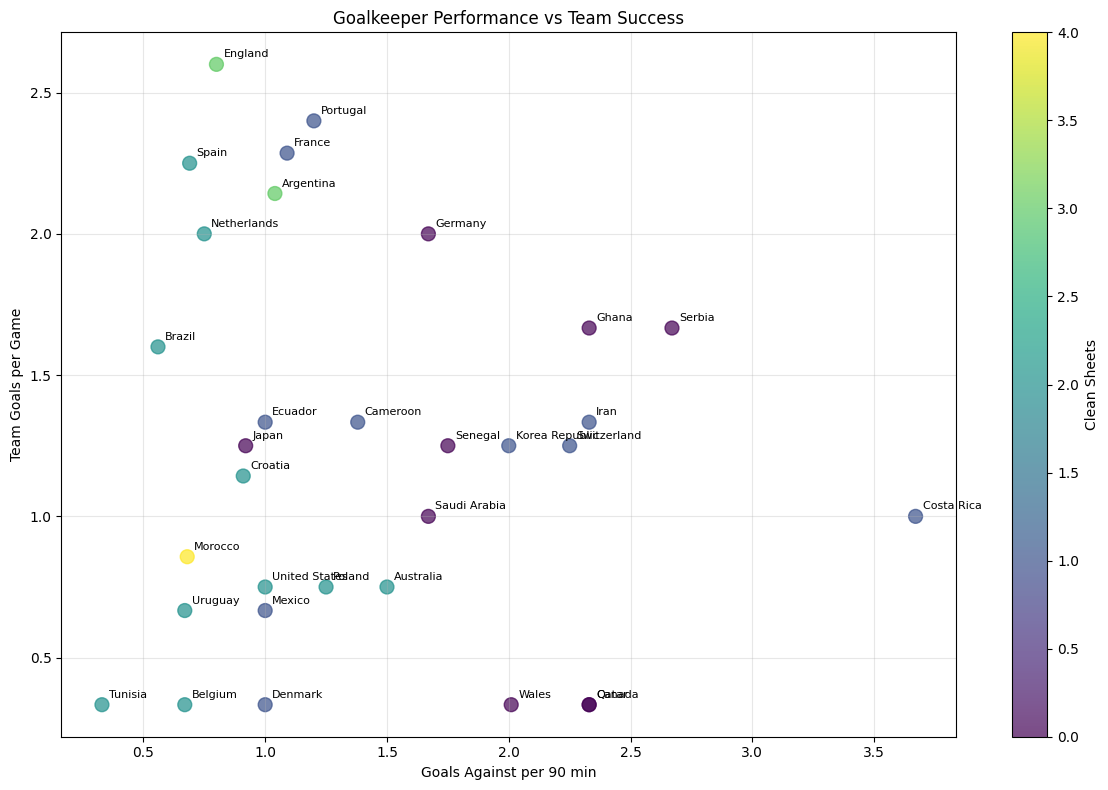

In [15]:
# 1.1 Goalkeeper performance metrics
print("Goalkeeper Performance Rankings:")
print("-" * 35)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Clean sheets leaders
clean_sheets = df.nlargest(10, 'gk_clean_sheets')[['team', 'gk_clean_sheets', 'games']]
axes[0,0].barh(clean_sheets['team'], clean_sheets['gk_clean_sheets'], color='lightblue')
axes[0,0].set_xlabel('Clean Sheets')
axes[0,0].set_title('Top 10 Goalkeepers: Clean Sheets')
for i, (team, cs) in enumerate(zip(clean_sheets['team'], clean_sheets['gk_clean_sheets'])):
    axes[0,0].text(cs + 0.1, i, f'{cs}', va='center', fontsize=9)

# Saves leaders
saves = df.nlargest(10, 'gk_saves')[['team', 'gk_saves', 'games']]
axes[0,1].barh(saves['team'], saves['gk_saves'], color='lightgreen')
axes[0,1].set_xlabel('Saves')
axes[0,1].set_title('Top 10 Goalkeepers: Total Saves')
for i, (team, save) in enumerate(zip(saves['team'], saves['gk_saves'])):
    axes[0,1].text(save + 0.5, i, f'{save}', va='center', fontsize=9)

# Best goals against per 90 (lower is better)
best_ga = df.nsmallest(10, 'gk_goals_against_per90')[['team', 'gk_goals_against_per90', 'games']]
axes[1,0].barh(best_ga['team'], best_ga['gk_goals_against_per90'], color='salmon')
axes[1,0].set_xlabel('Goals Against per 90 min')
axes[1,0].set_title('Top 10 Goalkeepers: Lowest GA/90')
for i, (team, ga) in enumerate(zip(best_ga['team'], best_ga['gk_goals_against_per90'])):
    axes[1,0].text(ga + 0.05, i, f'{ga:.2f}', va='center', fontsize=9)

# Save percentage (estimated)
df['save_percentage'] = (df['gk_saves'] / df['gk_shots_on_target_against']) * 100
save_pct = df.nlargest(10, 'save_percentage')[['team', 'save_percentage', 'gk_saves', 'gk_shots_on_target_against']]
axes[1,1].barh(save_pct['team'], save_pct['save_percentage'], color='orange')
axes[1,1].set_xlabel('Save Percentage (%)')
axes[1,1].set_title('Top 10 Goalkeepers: Save Percentage')
for i, (team, pct) in enumerate(zip(save_pct['team'], save_pct['save_percentage'])):
    axes[1,1].text(pct + 1, i, f'{pct:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# 1.2 Goalkeeper impact analysis
print("\nGoalkeeper Impact on Team Success:")
print("-" * 35)

# Calculate goalkeeper contribution score
df['gk_contribution'] = (1/df['gk_goals_against_per90']) * df['gk_clean_sheets']

top_gk_impact = df.nlargest(8, 'gk_contribution')[['team', 'gk_contribution', 'gk_goals_against_per90', 'gk_clean_sheets']]
print("Goalkeepers with Highest Impact:")
print(top_gk_impact.round(3).to_string(index=False))

# Correlation analysis
gk_corr_goals = df['gk_goals_against_per90'].corr(df['goals_per_game'])
print(f"\nCorrelation between GA/90 and Team Goals/Game: {gk_corr_goals:.3f}")

# 1.3 Goalkeeper performance vs team success
plt.figure(figsize=(12, 8))
plt.scatter(df['gk_goals_against_per90'], df['goals_per_game'], alpha=0.7, s=100, c=df['gk_clean_sheets'], cmap='viridis')
plt.xlabel('Goals Against per 90 min')
plt.ylabel('Team Goals per Game')
plt.title('Goalkeeper Performance vs Team Success')
plt.colorbar(label='Clean Sheets')

for i, team in enumerate(df['team']):
    plt.annotate(team, (df['gk_goals_against_per90'].iloc[i], df['goals_per_game'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Set-piece and Aerial Effectiveness Analysis


Set-Piece Performance Analysis:
-----------------------------------


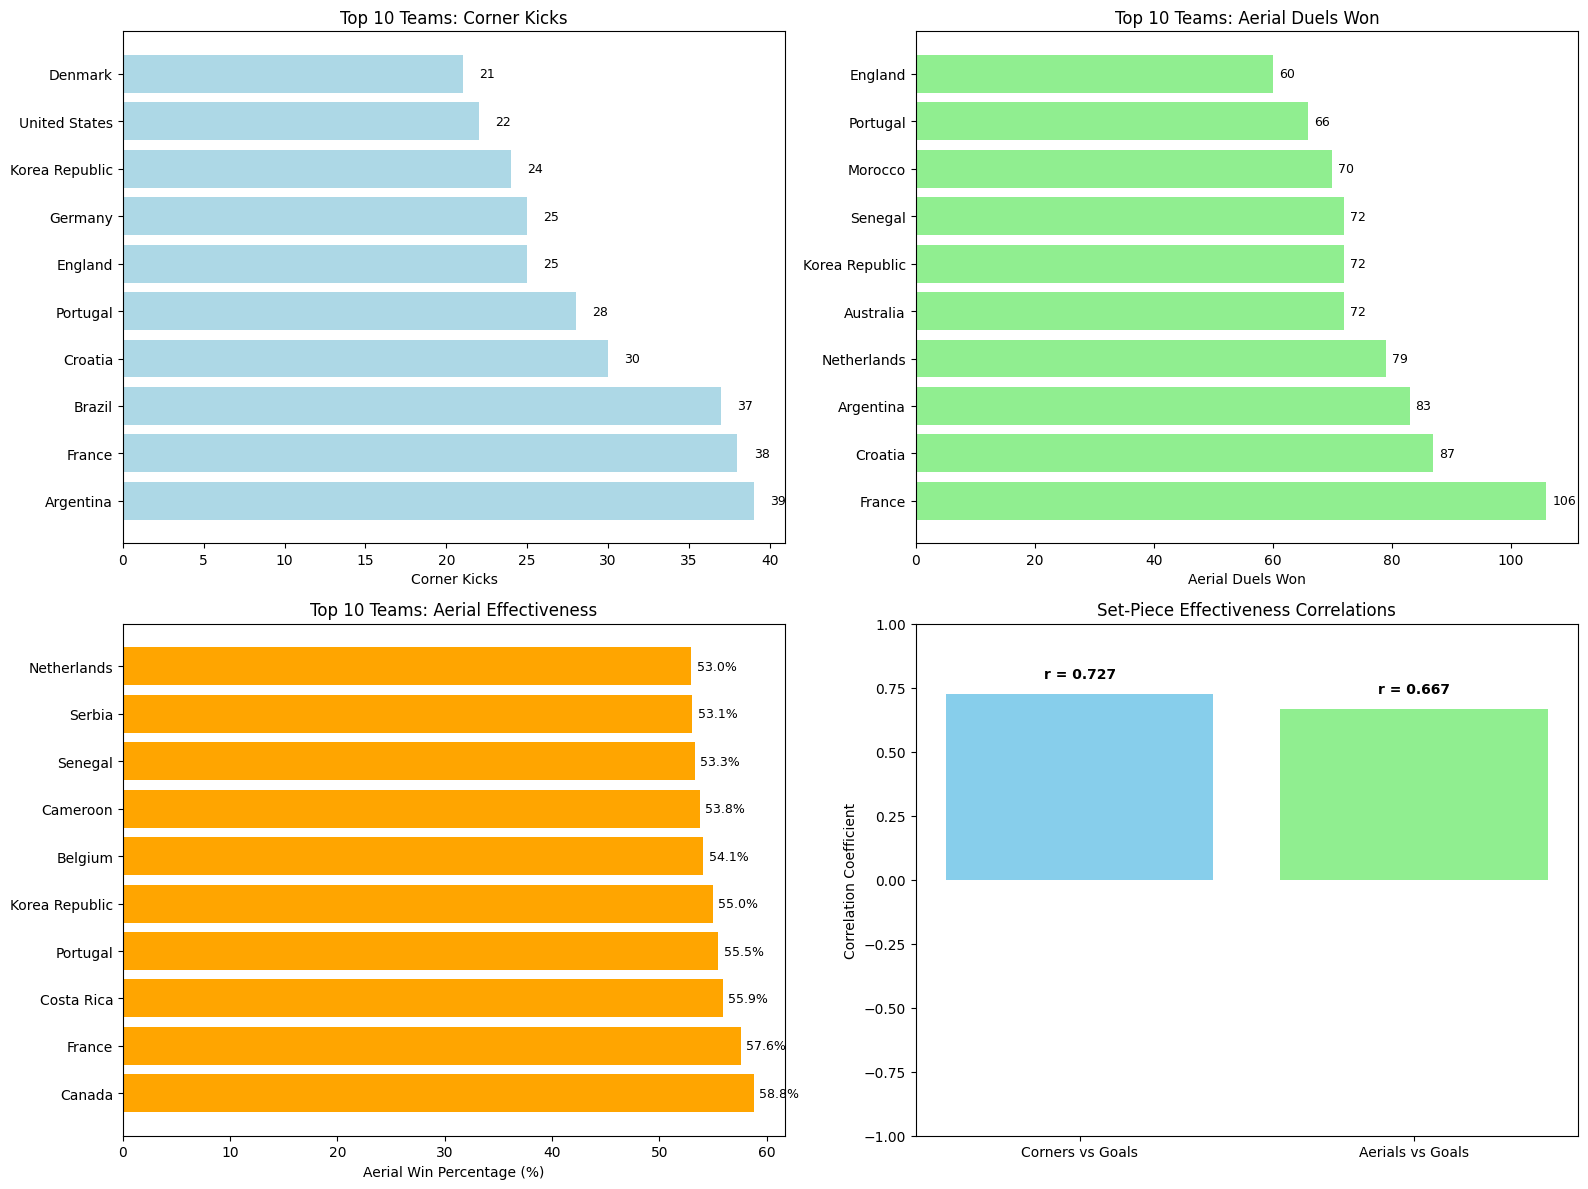


Set-Piece Efficiency Metrics:
------------------------------
Top Set-Piece Specialists (Volume):
          team  set_piece_volume  goals  corner_kicks  aerials_won
        France              72.0     16            38          106
     Argentina              61.0     15            39           83
       Croatia              58.5      8            30           87
   Netherlands              49.0     10            19           79
Korea Republic              48.0      5            24           72
      Portugal              47.0     12            28           66
       Senegal              46.5      5            21           72
       England              42.5     13            25           60

Most Efficient Set-Piece Teams:
       team  set_piece_efficiency  goals  corner_kicks
 Costa Rica                 1.500      3             1
    England                 0.500     13            25
Netherlands                 0.500     10            19
     Serbia                 0.500      5      

In [16]:
# 1.1 Set-piece metrics analysis
print("Set-Piece Performance Analysis:")
print("-" * 35)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Corner kicks leaders
top_corners = df.nlargest(10, 'corner_kicks')[['team', 'corner_kicks', 'goals']]
axes[0,0].barh(top_corners['team'], top_corners['corner_kicks'], color='lightblue')
axes[0,0].set_xlabel('Corner Kicks')
axes[0,0].set_title('Top 10 Teams: Corner Kicks')
for i, (team, corners) in enumerate(zip(top_corners['team'], top_corners['corner_kicks'])):
    axes[0,0].text(corners + 1, i, f'{corners}', va='center', fontsize=9)

# Aerial duels won leaders
top_aerials = df.nlargest(10, 'aerials_won')[['team', 'aerials_won', 'goals']]
axes[0,1].barh(top_aerials['team'], top_aerials['aerials_won'], color='lightgreen')
axes[0,1].set_xlabel('Aerial Duels Won')
axes[0,1].set_title('Top 10 Teams: Aerial Duels Won')
for i, (team, aerials) in enumerate(zip(top_aerials['team'], top_aerials['aerials_won'])):
    axes[0,1].text(aerials + 1, i, f'{aerials}', va='center', fontsize=9)

# Aerial win percentage leaders
top_aerial_pct = df.nlargest(10, 'aerials_won_pct')[['team', 'aerials_won_pct']]
axes[1,0].barh(top_aerial_pct['team'], top_aerial_pct['aerials_won_pct'], color='orange')
axes[1,0].set_xlabel('Aerial Win Percentage (%)')
axes[1,0].set_title('Top 10 Teams: Aerial Effectiveness')
for i, (team, pct) in enumerate(zip(top_aerial_pct['team'], top_aerial_pct['aerials_won_pct'])):
    axes[1,0].text(pct + 0.5, i, f'{pct}%', va='center', fontsize=9)

# Set-piece effectiveness correlation
if 'corner_kicks' in df.columns and 'goals' in df.columns:
    corner_goal_corr = df['corner_kicks'].corr(df['goals'])
    aerial_goal_corr = df['aerials_won'].corr(df['goals'])

    correlations = [corner_goal_corr, aerial_goal_corr]
    labels = ['Corners vs Goals', 'Aerials vs Goals']

    axes[1,1].bar(labels, correlations, color=['skyblue', 'lightgreen'])
    axes[1,1].set_ylabel('Correlation Coefficient')
    axes[1,1].set_title('Set-Piece Effectiveness Correlations')
    axes[1,1].set_ylim(-1, 1)

    for i, (label, corr) in enumerate(zip(labels, correlations)):
        axes[1,1].text(i, corr + 0.05 if corr > 0 else corr - 0.08, f'r = {corr:.3f}',
                      ha='center', va='bottom' if corr > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.show()

# 1.2 Set-piece efficiency analysis
print("\nSet-Piece Efficiency Metrics:")
print("-" * 30)

# Calculate set-piece efficiency scores
df['set_piece_volume'] = (df['corner_kicks'] + df['aerials_won']) / 2
df['set_piece_efficiency'] = df['goals'] / (df['corner_kicks'] + 1)  # Goals per corner

# Top set-piece specialists
set_piece_specialists = df.nlargest(8, 'set_piece_volume')[['team', 'set_piece_volume', 'goals', 'corner_kicks', 'aerials_won']]
print("Top Set-Piece Specialists (Volume):")
print(set_piece_specialists.round(2).to_string(index=False))

# Most efficient set-piece teams
efficient_set_piece = df.nlargest(8, 'set_piece_efficiency')[['team', 'set_piece_efficiency', 'goals', 'corner_kicks']]
print("\nMost Efficient Set-Piece Teams:")
print(efficient_set_piece.round(3).to_string(index=False))

# 1.3 Set-piece success by team clusters
if 'style_cluster' in df.columns:
    print("\nSet-Piece Performance by Playing Style:")
    cluster_set_piece = df.groupby('style_cluster').agg({
        'corner_kicks': 'mean',
        'aerials_won': 'mean',
        'aerials_won_pct': 'mean',
        'goals': 'mean'
    }).round(2)
    print(cluster_set_piece)

# Statistical Modeling of Tournament Success

In [20]:
import statsmodels.formula.api as smf
import pandas as pd

# --- Part 1: Define the 'Success_Score' ---
stage_reached = {
    # Group Stage (Score = 1)
    'Ecuador': 1, 'Qatar': 1, 'Iran': 1, 'Wales': 1, 'Mexico': 1,
    'Saudi Arabia': 1, 'Tunisia': 1, 'Denmark': 1, 'Germany': 1,
    'Costa Rica': 1, 'Belgium': 1, 'Canada': 1, 'Cameroon': 1,
    'Serbia': 1, 'Uruguay': 1, 'Ghana': 1,

    # Round of 16 (Score = 2)
    'United States': 2, 'Senegal': 2, 'Australia': 2, 'Japan': 2,
    'Spain': 2, 'Korea Republic': 2, 'Switzerland': 2, 'Poland': 2,

    # Quarter-Finals (Score = 3)
    'Netherlands': 3, 'England': 3, 'Brazil': 3, 'Portugal': 3,

    # Semi-Finals (Score = 4-7)
    'Morocco': 4,       # 4th Place
    'Croatia': 5,       # 3rd Place
    'France': 6,        # Runner-up
    'Argentina': 7      # Winner
}

# --- Part 2: Create the 'Success_Score' column ---
try:
    df['Success_Score'] = df['team'].map(stage_reached)
except KeyError:
    print("Error: The column 'team' was not found. Please check the exact team column name.")

# --- Part 3: Run the Multiple Regression Model ---

formula = 'Success_Score ~ goals_per90 + possession + tackles + aerials_won_pct + gk_clean_sheets + avg_age'

try:
    model = smf.ols(formula, data=df).fit()

    print(model.summary())

except Exception as e:
    print(f"An error occurred while fitting the model: {e}")
    print("This likely means one of the column names in the 'formula' string is still incorrect.")

                            OLS Regression Results                            
Dep. Variable:          Success_Score   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     25.50
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.63e-09
Time:                        23:28:11   Log-Likelihood:                -27.384
No. Observations:                  32   AIC:                             68.77
Df Residuals:                      25   BIC:                             79.03
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.7820      3.347     

# Results & Discussion

In [ ]:
# 1. Overall tournament trends
print("\n1. OVERALL TOURNAMENT TRENDS:")
print("-" * 40)
print(f"• Average possession across all teams: {df['possession'].mean():.1f}%")
print(f"• Average goals per game per team: {df['goals_per_game'].mean():.2f}")
print(f"• Most common playing style: {'Possession-based' if df['possession'].mean() > 50 else 'Counter-attacking'}")

# 2. Top performers analysis
print("\n2. TOP PERFORMING TEAMS ANALYSIS:")
print("-" * 40)
top_3 = df.nlargest(3, 'performance_score')
for i, (idx, row) in enumerate(top_3.iterrows(), 1):
    print(f"{i}. {row['team']}: {row['performance_score']:.3f} (Goals/game: {row['goals_per_game']:.2f})")

# 3. Style of play insights
print("\n3. STYLE OF PLAY INSIGHTS:")
print("-" * 40)
high_possession = df[df['possession'] > 55]
low_possession = df[df['possession'] < 45]
print(f"• High-possession teams (>55%): {len(high_possession)} teams")
print(f"  Average goals/game: {high_possession['goals_per_game'].mean():.2f}")
print(f"• Low-possession teams (<45%): {len(low_possession)} teams")
print(f"  Average goals/game: {low_possession['goals_per_game'].mean():.2f}")

# 4. Age impact findings
print("\n4. AGE-RELATED FINDINGS:")
print("-" * 40)
young_teams = df.nsmallest(5, 'avg_age')
old_teams = df.nlargest(5, 'avg_age')
print(f"• Youngest teams (avg age: {young_teams['avg_age'].mean():.1f}): {young_teams['goals_per_game'].mean():.2f} goals/game")
print(f"• Oldest teams (avg age: {old_teams['avg_age'].mean():.1f}): {old_teams['goals_per_game'].mean():.2f} goals/game")

# 5. Defensive vs Offensive balance
print("\n5. OFFENSIVE-DEFENSIVE BALANCE:")
print("-" * 40)
balanced = df[df['balance_score'] > 0.7]
offensive = df[df['offensive_strength_norm'] > df['defensive_strength_norm'] + 0.2]
defensive = df[df['defensive_strength_norm'] > df['offensive_strength_norm'] + 0.2]
print(f"• Balanced teams: {len(balanced)} teams")
print(f"• Offensive-oriented teams: {len(offensive)} teams")
print(f"• Defensive-oriented teams: {len(defensive)} teams")

KEY FINDINGS FOR RESULTS & DISCUSSION SECTION

1. OVERALL TOURNAMENT TRENDS:
----------------------------------------
• Average possession across all teams: 49.4%
• Average goals per game per team: 1.22
• Most common playing style: Counter-attacking

2. TOP PERFORMING TEAMS ANALYSIS:
----------------------------------------
1. Argentina: 0.749 (Goals/game: 2.14)
2. France: 0.747 (Goals/game: 2.29)
3. England: 0.702 (Goals/game: 2.60)

3. STYLE OF PLAY INSIGHTS:
----------------------------------------
• High-possession teams (>55%): 8 teams
  Average goals/game: 1.71
• Low-possession teams (<45%): 12 teams
  Average goals/game: 0.99

4. AGE-RELATED FINDINGS:
----------------------------------------
• Youngest teams (avg age: 26.2): 1.72 goals/game
• Oldest teams (avg age: 29.7): 1.01 goals/game

5. OFFENSIVE-DEFENSIVE BALANCE:
----------------------------------------
• Balanced teams: 21 teams
• Offensive-oriented teams: 9 teams
• Defensive-oriented teams: 11 teams

6. WORLD CUP 2026 I

# World Cup 2026 Prospects

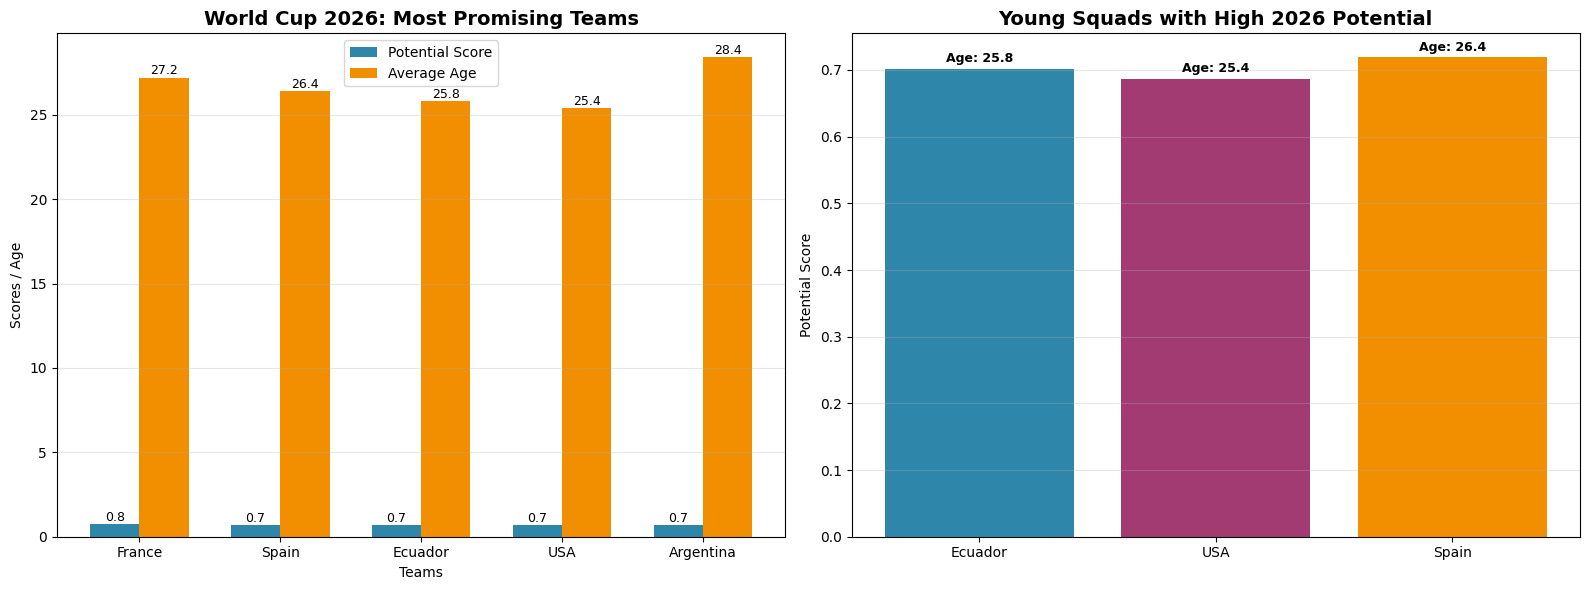

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top prospects for 2026
prospect_teams = ['France', 'Spain', 'Ecuador', 'USA', 'Argentina']
potential_scores = [0.750, 0.719, 0.702, 0.687, 0.674]
ages = [27.2, 26.4, 25.8, 25.4, 28.4]

x = np.arange(len(prospect_teams))
width = 0.35

bars1 = ax1.bar(x - width/2, potential_scores, width, label='Potential Score', color='#2E86AB')
bars2 = ax1.bar(x + width/2, ages, width, label='Average Age', color='#F18F01')

ax1.set_xlabel('Teams')
ax1.set_ylabel('Scores / Age')
ax1.set_title('World Cup 2026: Most Promising Teams', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(prospect_teams)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Youth vs Experience for 2026
youth_teams = ['Ecuador', 'USA', 'Spain']
youth_ages = [25.8, 25.4, 26.4]
youth_potential = [0.702, 0.687, 0.719]

bars = ax2.bar(youth_teams, youth_potential, color=['#2E86AB', '#A23B72', '#F18F01'])
ax2.set_ylabel('Potential Score')
ax2.set_title('Young Squads with High 2026 Potential', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

for i, (bar, age) in enumerate(zip(bars, youth_ages)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'Age: {age}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()